# 15. Maximum Sum Circular Subarray -- Kadane's algorithm -- cope with finding  maximum sum subarray）

Given a circular array C of integers represented by A, find the maximum possible sum of a non-empty subarray of C.

Here, a circular array means the end of the array connects to the beginning of the array.  (Formally, C[i] = A[i] when 0 <= i < A.length, and C[i+A.length] = C[i] when i >= 0.)

Also, a subarray may only include each element of the fixed buffer A at most once.  (Formally, for a subarray C[i], C[i+1], ..., C[j], there does not exist i <= k1, k2 <= j with k1 % A.length = k2 % A.length.)

Example 1:  
Input: [1,-2,3,-2]  
Output: 3  
Explanation: Subarray [3] has maximum sum 3

Example 2:   
Input: [5,-3,5]  
Output: 10  
Explanation: Subarray [5,5] has maximum sum 5 + 5 = 10

Example 3:  
Input: [3,-1,2,-1]  
Output: 4  
Explanation: Subarray [2,-1,3] has maximum sum 2 + (-1) + 3 = 4  

Example 4:  
Input: [3,-2,2,-3]  
Output: 3  
Explanation: Subarray [3] and [3,-2,2] both have maximum sum 3   

Example 5:  
Input: [-2,-3,-1]  
Output: -1  
Explanation: Subarray [-1] has maximum sum -1

- 对比两种情况
    - 1.正常形式，maximal subarray sum
        - 数组中的某一段子数组
    - 2. 首尾相连
        - 思路：（数组和） 减 （最小的子数组）
    - corner case：假如数组中全是负数，那么最大的数组和就是数组的最大值

In [29]:
def maxSubarraySumCircular(A) -> int:
    if all(t<0 for t in A): 
        return max(A)
    ma_, mi_=float('-inf'),float('inf')
    ma, mi = float('-inf'),float('inf')
    s = su = 0
    for i in A:
        s += i
        ma_ = max(ma_,s)
        mi_ = min(mi_,s)
        ma = max(ma,s-mi_)
        mi = min(mi,s-ma_)
        su += i
        #print("i:",i,"s:",s,"ma_:",ma_,"mi_:",mi_,"ma:",ma,"mi:",mi,"su:",su)
    return max(ma,su-mi)

In [30]:
maxSubarraySumCircular([5,-3,5])

10

# 16. Odd Even Linked List

Given a singly linked list, group all odd nodes together followed by the even nodes. Please note here we are talking about the node number and not the value in the nodes.

You should try to do it in place. The program should run in **O(1) space complexity and O(nodes) time complexity**.

Example 1:  
Input: 1->2->3->4->5->NULL   
Output: 1->3->5->2->4->NULL  

Example 2:  
Input: 2->1->3->5->6->4->7->NULL  
Output: 2->3->6->7->1->5->4->NULL  

Note:  
The relative order inside both the even and odd groups should remain as it was in the input.  
The first node is considered odd, the second node even and so on ...

**Idea**
- Construc odd + even linked lists (d1,d2). i: node number (odd + even)
- Traversal in head. put odd node in d1, put even in d2
- Notice: even.next = None, terminate the list
- At last, connect d1 and d2

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def oddEvenList(self, head: ListNode) -> ListNode:       
        d1 = odd = ListNode(0) #initialization, d1, odd node number
        d2 = even = ListNode(0)                #d2, even node number
        i = 1
        while head: #traversal in head
            if i%2:
                odd.next = head
                odd = odd.next
            else:
                even.next = head
                even = even.next
            i += 1
            head = head.next
        even.next = None
        odd.next = d2.next
        return d1.next

# 17. Find All Anagrams in a String -- Sliding windows / Hash table

Given a string s and a non-empty string p, find all the start indices of p's anagrams in s.  
Strings consists of lowercase English letters only and the length of both strings s and p will not be larger than 20,100.  
The order of output does not matter.

Example 1:  
Input:  
s: "cbaebabacd" p: "abc"  
Output:    
[0, 6]  

Explanation:
The substring with start index = 0 is "cba", which is an anagram of "abc".
The substring with start index = 6 is "bac", which is an anagram of "abc".

Example 2:  
Input:   
s: "abab" p: "ab"   
Output:  
[0, 1, 2]  

Explanation:
The substring with start index = 0 is "ab", which is an anagram of "ab".  
The substring with start index = 1 is "ba", which is an anagram of "ab".  
The substring with start index = 2 is "ab", which is an anagram of "ab". 

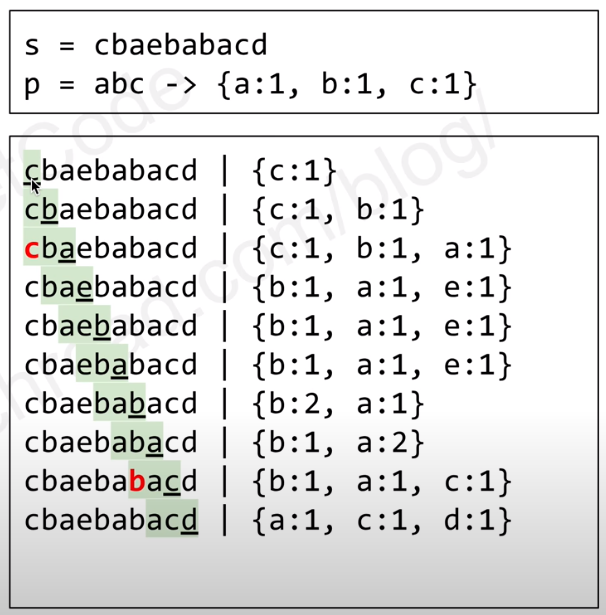

In [142]:
from IPython.display import Image
Image(filename = '.\Find All Anagrams in a String.jpg', width=200, height=300)

In [137]:
def findAnagrams(s: str, p: str):
    import collections
    ans = []
    scounter = collections.Counter()
    pcounter = collections.Counter(p)
    lens = len(s)
    lenp = len(p)
    for i in range(lens):
        scounter[s[i]] += 1
        if i >= lenp:
            scounter[s[i-lenp]] -= 1
            if scounter[s[i-lenp]] == 0:
                del scounter[s[i-lenp]]
        if scounter == pcounter:
            ans.append(i - lenp + 1)
    return ans

In [138]:
s = "cbaebabacd" 
p = "abc"
findAnagrams(s,p)

Counter({'c': 1})
Counter({'c': 1, 'b': 1})
Counter({'c': 1, 'b': 1, 'a': 1})
Counter({'c': 1, 'b': 1, 'a': 1, 'e': 1})
Counter({'b': 2, 'a': 1, 'e': 1})
Counter({'a': 2, 'b': 1, 'e': 1})
Counter({'b': 2, 'a': 1, 'e': 1})
Counter({'b': 2, 'a': 2})
Counter({'a': 2, 'b': 1, 'c': 1})
Counter({'b': 1, 'a': 1, 'c': 1, 'd': 1})


[0, 6]

In [143]:
# My Solution - time exceeded
def findAnagrams2(s: str, p: str):
    from collections import Counter
    ans = []
    pcounter = Counter(p)
    lens = len(s)
    lenp = len(p)
    for i in range(lens):
        if s[i] in p:
            if Counter(s[i:i+lenp]) == pcounter:
                ans.append(i)
    return ans

In [139]:
s2 = "abab"
p2 = "ab"
findAnagrams2(s2,p2)

[0, 1, 2]